# Computer Vision: Nearest Neighbor

## An introductory exploration into the realm of Computer Vision

This algorithm categorizes images in classes by minimizing difference between the two images' pixels. (This would result in getting the average, closest colored image as the class label)

In [1]:
from keras.datasets import cifar10
import keras
from keras import utils as np_utils
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


(train_x, _), (_, _) = cifar10.load_data()

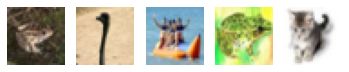

In [2]:
# Helper function to show array on images
def showImages(imgs_arr, num_cols):
    f, axarr = plt.subplots(1,num_cols)

    for c in range(num_cols):
        if (c >= len(imgs_arr)):
            return
        axarr[c].axis('off')
        axarr[c].imshow(imgs_arr[c])
            
# 5 extracted images that represent different colors
class_images = np.array([train_x[22], train_x[41], train_x[92], train_x[95], train_x[266]])
showImages(class_images, 5)

In [3]:
# 5 lists of associated images
nearest_neighbor_arr = [[(class_images[0],0)],
                        [(class_images[1],0)],
                        [(class_images[2],0)],
                        [(class_images[3],0)],
                        [(class_images[4],0)]]

In [4]:
# Shape of image is (32, 32, 3)
def classifyImage(class_images, img):
    img_differences = np.zeros(len(class_images))
    
    for i in range(len(class_images)):
        delta_arr = (class_images[i] - img)
        diff = np.linalg.norm(delta_arr)
        
        img_differences[i] = diff
        
    # Returns class it is closest to and how different it was from that class
    return (img_differences.argmin(), min(img_differences))

In [5]:
# A random sample of images from our set of images
for img in train_x[30000:40000]:
    result = classifyImage(class_images, img)
    nearest_neighbor_index = result[0]
    nearest_neighbor_amount = result[1]
    nearest_neighbor_arr[nearest_neighbor_index].append((img, nearest_neighbor_amount))

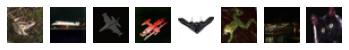

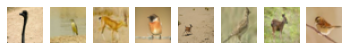

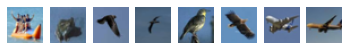

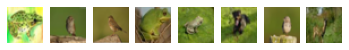

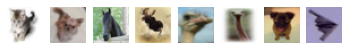

In [6]:
# Sort the images in order of closeness
for arr in nearest_neighbor_arr:
    sorted_arr = sorted(arr, key=lambda x: x[1])
    sorted_imgs = [i[0] for i in sorted_arr]
    showImages(np.array(sorted_imgs), 8)

## References and resources:

* https://cs231n.github.io/classification/
* https://www.cs.toronto.edu/~kriz/cifar.html